In [1]:
# Load python packages - pep 8 specifies core packages first... third party next
import os

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import geopandas as gpd
import xarray as xr
import rioxarray as rxr
import earthpy as et
import earthpy.plot as ep
from shapely.geometry import mapping

# Prettier plotting
import seaborn as sns
sns.set(font_scale=1.3)
sns.set_style("white")


et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME,
                      'earth-analytics',
                      'data'))

## Open Raster Data  Using Context Manager

In [2]:
# Because I may use the path to the data several times, i'm constructing the path in 2 steps!
data_path = os.path.join("colorado-flood",
                         "spatial",
                         "boulder-leehill-rd")
dtm_path = os.path.join(data_path,
                        "pre-flood",
                        "lidar",
                        "pre_DTM.tif")


lidar_dtm_pre = rxr.open_rasterio(dtm_path)
lidar_dtm_pre

<xarray.DataArray (band: 1, y: 2000, x: 4000)>
[8000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
    spatial_ref  int64 0
Attributes:
    _FillValue:    -3.4028234663852886e+38
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref

## Plot The Data 

Notice that the data below look funky or don't import -- oops...

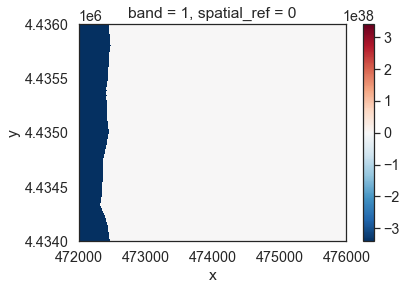

In [3]:
f, ax = plt.subplots()
lidar_dtm_pre.plot(ax=ax)
plt.show()

# What Does a Histogram Show You?

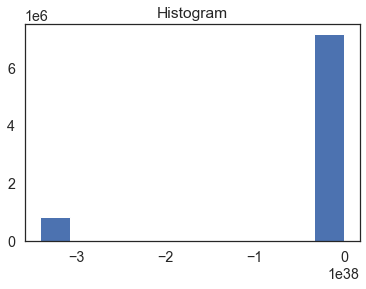

In [4]:
# What do you notice about the histogram of the data?
f, ax = plt.subplots()
lidar_dtm_pre.plot.hist(ax=ax)
plt.show()

In [5]:
# This is elevation data- what do you notice
np.nanmin(lidar_dtm_pre), np.nanmax(lidar_dtm_pre)

(-3.4028235e+38, 2087.43)

In [6]:
# View the no data value (sometimes referred to as a fill value)
lidar_dtm_pre.rio.nodata

-3.4028235e+38

In [7]:
lidar_dtm_pre.shape

(1, 2000, 4000)

## Open the data and mask no data values

Below you open the data and mask no data values. YOu also use
squeeze to get rid of that extra first dimension which is the value
`1`. The array only has one layer so the additional dimension 
is not needed

In [8]:
lidar_dtm_pre = rxr.open_rasterio(dtm_path,
                                  masked=True).squeeze()
print("The shape is", lidar_dtm_pre.shape)
print("The min and max values are: ",
      np.nanmin(lidar_dtm_pre),
      np.nanmax(lidar_dtm_pre))

The shape is (2000, 4000)
The min and max values are:  1676.2099609375 2087.429931640625


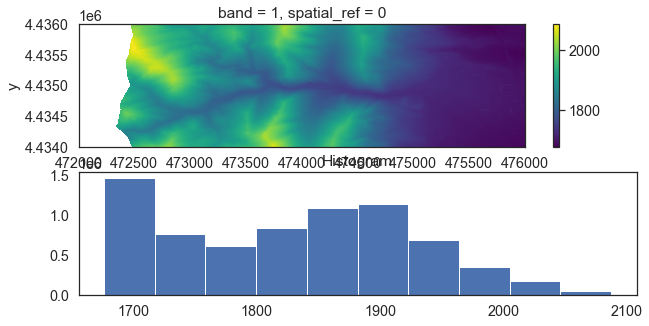

In [9]:
# Plot again
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))
lidar_dtm_pre.plot.imshow(ax=ax1)
lidar_dtm_pre.plot.hist(ax=ax2)

plt.show()

In [10]:
# View the shape or the pixel dimensions of the raster
# Note that .shape is a numpy array ATTRIBUTE
lidar_dtm_pre.shape

(2000, 4000)

## Create a Histogram of Raster Data
frequency  -- of elevations values

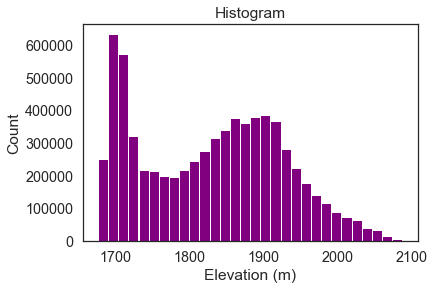

In [11]:
# Remember that you don't want to use plt.show() in your homework!!
f, ax = plt.subplots()
lidar_dtm_pre.plot.hist(ax=ax,
                        bins=30,
                        color="purple")
ax.set(xlabel="Elevation (m)",
       ylabel="Count")
plt.show()

## Open Digital Surface Model from the Pre Flood Data

In [12]:
# Open up pre-flood DSM
dsm_pre_path = os.path.join(data_path,
                            "pre-flood",
                            "lidar",
                            "pre_DSM.tif")

lidar_dsm_pre = rxr.open_rasterio(dsm_pre_path, masked=True).squeeze()

lidar_dsm_pre

<xarray.DataArray (y: 2000, x: 4000)>
[8000000 values with dtype=float64]
Coordinates:
    band         int64 1
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref

In [13]:
print("The shape is", lidar_dsm_pre.shape)
print("The min and max values are: ",
      np.nanmin(lidar_dsm_pre),
      np.nanmax(lidar_dsm_pre))

The shape is (2000, 4000)
The min and max values are:  1676.2099609375 2096.0400390625


## Subtract the Rasters

In [14]:
# subtract the dtm from the DSM to create a CHM
# IMPORTANT: be sure to review the lidar lessons!!
lidar_chm_pre = lidar_dsm_pre - lidar_dtm_pre
# view min and max value of the calculated CHM -- numpy array attributes
np.nanmin(lidar_chm_pre), np.nanmax(lidar_chm_pre)

(0.0, 26.9300537109375)

In [15]:
# the output calculated image is a xarray object
lidar_chm_pre

<xarray.DataArray (y: 2000, x: 4000)>
array([[       nan,        nan,        nan, ..., 0.        , 0.17004395,
        0.96008301],
       [       nan,        nan,        nan, ..., 0.        , 0.09008789,
        1.64001465],
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.07995605],
       ...,
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.        ],
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.        ],
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.        ]])
Coordinates:
    band         int64 1
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
    spatial_ref  int64 0

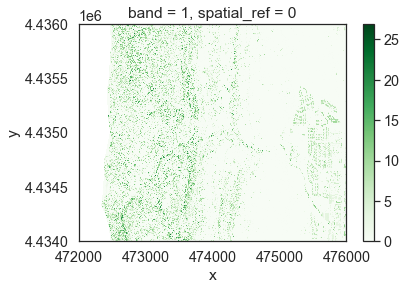

In [16]:
# The commented line below can be used if you want to interact with your raster (mouse over to view values)
# %matplotlib notebook
# TODO: This is now throwing a runtime warning... Your instructor is looking into why!

# Plot the data - chm data
lidar_chm_pre.plot.imshow(
    cmap="Greens")
plt.show()

## Classify The Canopy Height Model

Classify in this instance refers to reassigning values in an existing raster to another value.

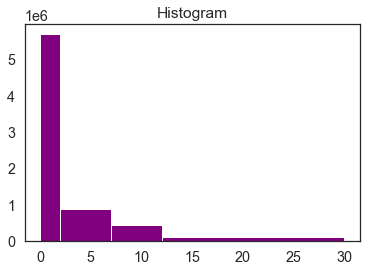

In [17]:
# plot a histogram of the data but specify the bins you'd like to see
lidar_chm_pre.plot.hist(
    bins=[0, 2, 7, 12, 30],
    color="purple")
plt.show()  # remember to not use plt.show() in your homework as it messes up the autograder

In [18]:
type(lidar_chm_pre)

xarray.core.dataarray.DataArray

In [19]:
# define the bins to use in classification
class_bins = [-np.inf, 2, 7, 12, np.inf]
# classify your raster using numpy digitize
# Remember that digitize is simple reassigning existing values to a new value as specified
# in your class_bins list above!

lidar_chm_pre_class = xr.apply_ufunc(np.digitize,  # this is the function that you wish to call on the data
                                     lidar_chm_pre,  # your xarray object
                                     class_bins)  # the bins you wish to use to digitize
lidar_chm_pre_class.values

array([[5, 5, 5, ..., 1, 1, 1],
       [5, 5, 5, ..., 1, 1, 1],
       [5, 5, 5, ..., 1, 1, 1],
       ...,
       [5, 5, 5, ..., 1, 1, 1],
       [5, 5, 5, ..., 1, 1, 1],
       [5, 5, 5, ..., 1, 1, 1]])

In [20]:
# View unique values in the data
# Notice that now the values span from 1-5.
# Also note that the value 1 is likely no data as it's < 0 in the class bins above
np.unique(lidar_chm_pre_class)

array([1, 2, 3, 4, 5])

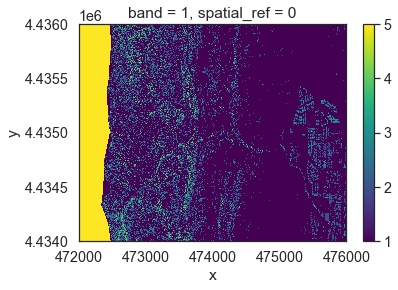

In [21]:
# Look at the data - what do you notice?
lidar_chm_pre_class.plot.imshow()

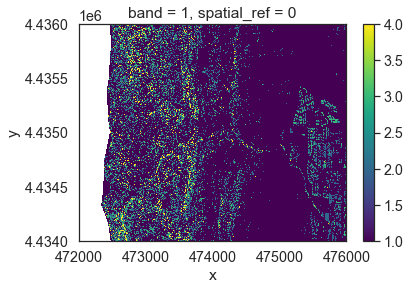

In [22]:
# Mask cells with a value of 5 which is a fill value
pre_lidar_chm_class_ma = lidar_chm_pre_class.where(lidar_chm_pre_class != 5)
pre_lidar_chm_class_ma.plot.imshow()
plt.show()

## Add a Custom Legend to Your Plot with EarthPy

Note that the lessons online need to be updated!! I will do this tonight or tomorrow but you can use this code as an example of how legends work with earthpy. You can also look at the earthpy docs!!

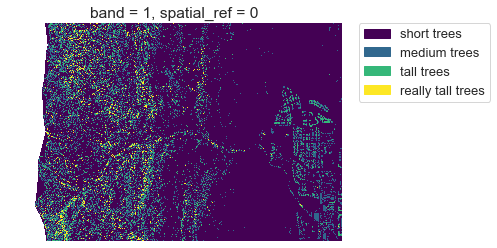

In [23]:
# This is how you can create your own custom colormap!
# This is optional but good to know how to do
colors = ['linen',
          'lightgreen',
          'darkgreen',
          'maroon']
height_class_labels = ["short trees",
                       "medium trees",
                       "tall trees",
                       "really tall trees"]

# Create a colormap from a list of colors
cmap = ListedColormap(colors)

f, ax = plt.subplots()
# Turn off the default colorbar and add an earthpy legend
im = pre_lidar_chm_class_ma.plot.imshow(add_colorbar=False)
ep.draw_legend(im, titles=height_class_labels)
# This line below turns off the ticks and black borders on your image
ax.set_axis_off()
plt.show()

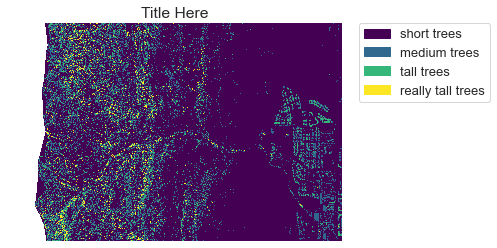

In [24]:
# Add labels

f, ax = plt.subplots()
# Turn off the default colorbar and add an earthpy legend
im = pre_lidar_chm_class_ma.plot.imshow(add_colorbar=False)
ep.draw_legend(im, titles=height_class_labels)
# This line below turns off the ticks and black borders on your image
ax.set(title="Title Here")
ax.set_axis_off()
plt.show()

## Crop a raster using rioxarray

The example above ran you through several raster operations. the one thing it skipped was cropping the data prior to processing it. You can crop when you import the data initially with rasterio as seen below. For your homework, you should do this when you import each raster dataset!

In [25]:
# Open the crop extent that need to crop the data!
clip_extent_path = os.path.join(data_path,
                                "clip-extent.shp")
crop_extent = gpd.read_file(clip_extent_path)

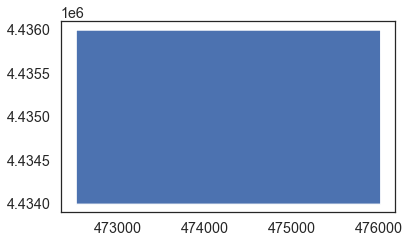

In [26]:
# View the cropped data layer
crop_extent.plot()
plt.show()

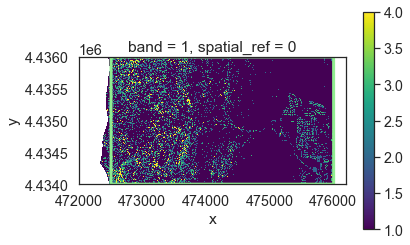

In [27]:
# overlay the two datasets
# Note that the crop extent will remove some of the uneven edge on the left (West) side of the image
f, ax = plt.subplots()
pre_lidar_chm_class_ma.plot.imshow(
    ax=ax)
crop_extent.boundary.plot(ax=ax,
                          edgecolor="lightgreen",
                          color=None,
                          linewidth=3)
plt.show()

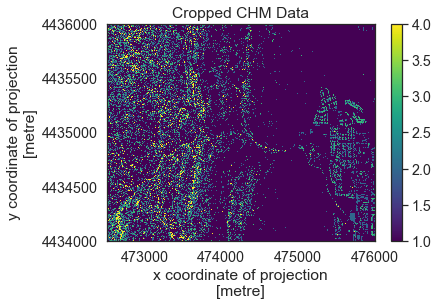

In [28]:
# Crop the chm using rioxarray

pre_chm_clip = pre_lidar_chm_class_ma.rio.clip(crop_extent.geometry.apply(mapping),
                                                              # This is needed if your GDF is in a diff CRS than the raster data
                                                              crop_extent.crs)


# Plot the cropped data
f, ax=plt.subplots()
pre_chm_clip.plot.imshow(ax=ax)

# Use this is you want to turn of scientific notation for your plots
ax.ticklabel_format(useOffset=False, 
                    style='plain')
ax.set(title="Cropped CHM Data")
plt.show()